In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_indiv = pd.read_csv("../../scripts/models/models/best_model_test/test_metrics_indiv.csv")
df_indiv = df_indiv.rename(columns={"Unnamed: 0": "label"})

In [3]:
df_agg = pd.read_csv("../../scripts/models/models/best_model_test/test_metrics_agg.csv")

In [4]:
df_indiv = df_indiv.sort_values(by=['roc_auc'], ascending=True).reset_index(drop=True)

In [5]:
df_indiv.head()

,label,roc_auc,avg_prec
0,allergy,0.378756,0.000534
1,physiological,0.399603,0.001083
2,motion,0.429192,0.001113
3,level,0.439835,0.004759
4,amelioration,0.456053,0.009025


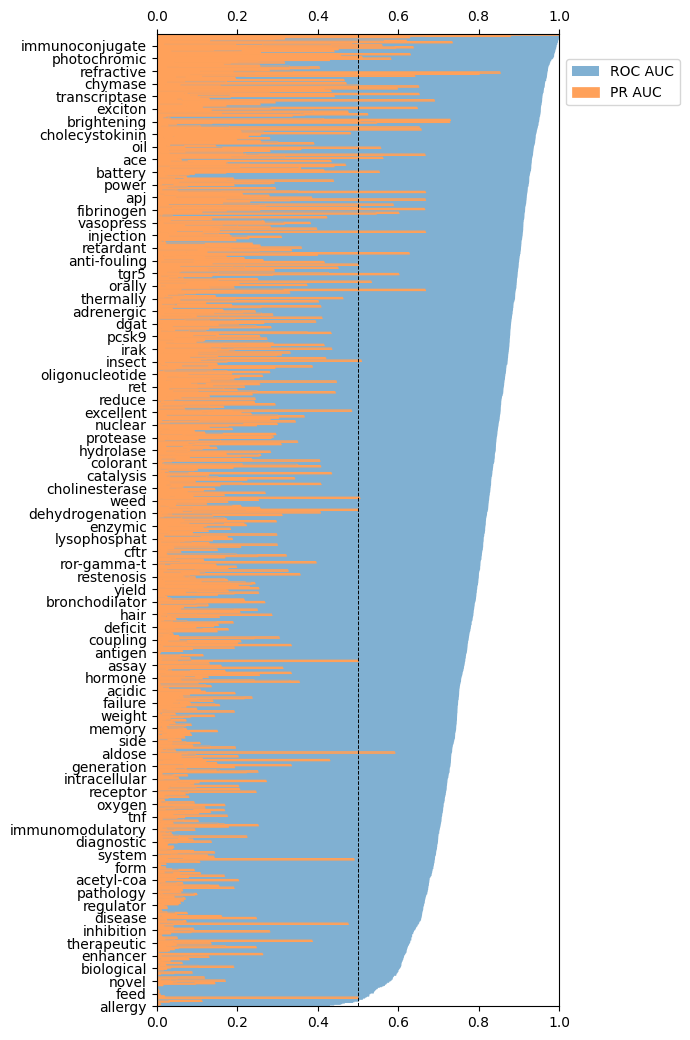

In [6]:
# create bar plot of roc_auc and avg_prec by index

plt.figure(figsize=(7, 10.5))


plt.fill_betweenx(df_indiv.index,
                  df_indiv['roc_auc'],
                  step="pre",
                  alpha=1,
                  color=(128/256,177/256,211/256),
                  linewidth=0.01,
                )

plt.fill_betweenx(df_indiv.index,
                    df_indiv['avg_prec'],
                    step="pre",
                    alpha=1,
                    color="#FFA15A",
                    linewidth=0.5,
                )


plt.step(x=df_indiv['roc_auc'],
         y=df_indiv.index, 
         color=(128/256,177/256,211/256),
         linewidth=0.01,
         )

# fill under
plt.step(x=df_indiv['avg_prec'],
         y=df_indiv.index, 
         color="#FFA15A",
         # small line width to fill under
          linewidth=0.5,
         )


# make vertical black dash line at x=0.5. Label
plt.axvline(x=0.5, color='black', linestyle='--', linewidth=0.7, label='ROC Baseline')





plt.ylim(0, len(df_indiv.index) - 1)
plt.xlim(0, 1)

# override every 10th y labels with df_indiv['label']
plt.yticks(df_indiv.index[::20], df_indiv['label'][::20], rotation=0)

# x labels on top, vertical lines
plt.tick_params(axis='x', top=True, labeltop=True, bottom=True, labelbottom=True)

# outside legend
plt.legend(['ROC AUC', 'PR AUC'], loc='center left', bbox_to_anchor=(1, 0.95))

plt.tight_layout()
plt.savefig('best_model_plot.png', dpi=300)
plt.show()